In [1]:
#| default_exp rally

# Rally

> Easily analyze a pickleball rally

In [77]:
#| hide
from nbdev.showdoc import *
from fastcore.test import *
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
#| export
from pklshop.data import *
from pklshop.stats import *
from pklshop.name import *
from pklshop.game import *
from pklshop.match import *
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
#! Need to think about how to store these tables so that functions can use them
#! but don't want to have to pass specific tables every time
rally = get_tab_as_df("rally")
players = get_tab_as_df("player")
game = get_tab_as_df("game")
team = get_tab_as_df("team")
match = get_tab_as_df("match")
tournament = get_tab_as_df("tournament") 
shots = get_tab_as_df("shot")

In [230]:
class Rally:
    def __init__(self, rally_id: str):
        self.rally_id= rally_id
        self.rally = rally[rally.rally_id == rally_id] # todo catch invalid rally number
        self.shots = shots[shots.rally_id == rally_id]
        self.xcoords = self.shots.sort_values("shot_nbr").loc_x
        self.ycoords = self.shots.sort_values("shot_nbr").loc_y
        # self.game_id = self.rally.game_id.iloc[0]
        # self.match_id = self.rally.match_id.iloc[0]
    
    def __str__(self):
        return f"Rally {self.rally_id}"
    __repr__ = __str__

    def plot_rally(self):
        y_arr = []
        c_map_arr = range(len(self.xcoords))
        for i, y in enumerate(self.ycoords):
            #Reverse the y location of every other shot
            if i % 2 == 0:
                y_arr.append(y)
            else:
                y_arr.append(-y) 
        plt.figure(figsize=(5,5.5))
        plt.scatter(self.xcoords, y_arr, c=c_map_arr, cmap='Blues')
        plt.axhline(y=0, color='k')

        plt.xlim(-2.5, 22.5)
        plt.ylim(-24.5, 24.5)

    # todo plot the court and rally appropriately

In [231]:
r = Rally("R1000")

In [232]:
r.shots.sort_values("shot_nbr").head()

,shot_id,rally_id,shot_nbr,shot_type_orig,shot_type,player_id,entry_ts,btt_before,btt_after,loc_x,loc_y,next_loc_x,next_loc_y,shot_type_model_id,whtb_model_id,maint_dtm,maint_app,create_dtm,create_app
11317,S10554,R1000,1,SE,None,P13,2022-08-16 16:56:22.270835,None,0.4062,16.74,20.17,15.82,22.80,None,None,2022-08-16 21:22:01.298152+00:00,postgres,2022-08-16 21:22:01.298152+00:00,postgres
11324,S10555,R1000,2,R,None,P6,2022-08-16 16:56:24.665787,0.4062,0.5998,15.82,22.80,3.11,20.85,None,None,2022-08-16 21:22:01.299150+00:00,postgres,2022-08-16 21:22:01.299150+00:00,postgres
11331,S10556,R1000,3,tsDrp,None,P23,2022-08-16 16:56:27.875736,0.5998,0.3654,3.11,20.85,7.12,7.56,None,None,2022-08-16 21:22:01.300137+00:00,postgres,2022-08-16 21:22:01.300137+00:00,postgres
20185,S10557,R1000,4,O,tzRep,P6,2022-08-16 16:56:30.098738,0.3654,0.2540,7.12,7.56,8.72,18.56,Classify_Other_Shots_StackedEnsemble_BestOfFam...,WWTB_ClassifierDRF_1_AutoML_1_20221108_171453.zip,2022-11-08 23:25:58.791397+00:00,postgres,2022-08-16 21:22:01.301326+00:00,postgres
797,S10558,R1000,5,O,tzApp,P13,2022-08-16 16:56:31.852941,0.2540,0.4553,8.72,18.56,5.86,7.79,Classify_Other_Shots_StackedEnsemble_BestOfFam...,WWTB_ClassifierDRF_1_AutoML_1_20221108_171453.zip,2022-11-08 23:25:58.791397+00:00,postgres,2022-08-16 21:22:01.302569+00:00,postgres


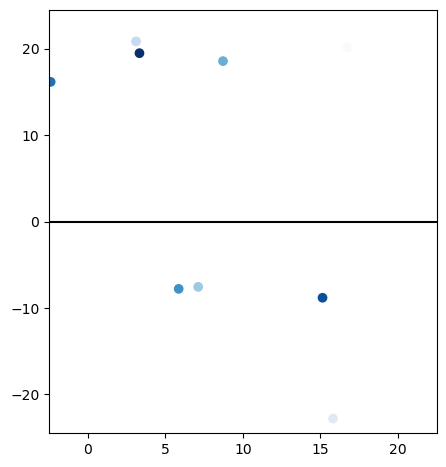

In [233]:
r.plot_rally()

In [142]:
shots.columns

Index(['shot_id', 'rally_id', 'shot_nbr', 'shot_type_orig', 'shot_type',
       'player_id', 'entry_ts', 'btt_before', 'btt_after', 'loc_x', 'loc_y',
       'next_loc_x', 'next_loc_y', 'shot_type_model_id', 'whtb_model_id',
       'maint_dtm', 'maint_app', 'create_dtm', 'create_app'],
      dtype='object')

In [32]:
r.rally.columns

Index(['rally_id', 'match_id', 'game_id', 'rally_nbr', 'srv_team_id',
       'srv_player_id', 'rtrn_team_id', 'rtrn_player_id', 'ts_player_id',
       'ts_type', 'w_team_id', 'to_ind', 'to_team_id', 'rally_len',
       'srv_switch_ind', 'rtrn_switch_ind', 'srv_team_flipped_ind',
       'rtrn_team_flipped_ind', 'ending_type', 'ending_player_id', 'lob_cnt',
       'dink_cnt', 'maint_dtm', 'maint_app', 'create_dtm', 'create_app'],
      dtype='object')

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()